# Import Libraries

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Definition


> This notebook is a part of the Kaggle "[LLM - Detect AI Generated Text](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/overview)" competition



This competition challenges participants to develop a machine learning model that can accurately detect whether an essay was written by a student or an LLM. The competition dataset comprises a mix of student-written essays and essays generated by a variety of LLMs.



# Competition Dataset

## Dataset Link
[LLM - Detect AI Generated Text Dataset](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/data)
## Dataset Description


* All of the essays were written in response to one of **seven essay prompts**.
* For each prompt, the subject (student or LLM) is given a list of source text to read and write their response from
  - Students were instructed to read one or more source texts and then write a response.
  - Participants of the competition should use the prompts and source text (provided in "train_prompts.csv") to generate AI generated Essays
* The **training set** includes just answers from two prompts, Essays from two of the prompts compose the **training set**, while the answers for the other 5 compose the **hidden test set**.
* Nearly all of the training set essays were written by students, with only a few generated essays given as examples.
* Participants of the competition are responsible to generate more essays to use as training data.



> **Note**: This is a Code Competition. The data in `test_essays.csv` is dummy data to help you author your solutions. When your submission is scored, this example test data will be replaced with the full test set. There are about **9,000 essays** in the test set, both student-written and LLM-generated.




## File structure
---

#### `{test|train}_essays.csv`
- `id` - A unique identifier for each essay.
- `prompt_id` - Identifies the prompt the essay was written in response to.
- `text` - The essay text itself.
- `generated` - Whether the essay was written by a student (`0`) or generated by an LLM (`1`). This field is the target and is **not present** in `test_essays.csv`.



---



#### `train_prompts.csv`
- This file is not important for training.
- It is provided in the competition to be used for LLM essay generation.

Essays were written in response to information in these fields:

- `prompt_id` - A unique identifier for each prompt.
- `prompt_name` - The title of the prompt.
- `instructions` - The instructions given to students.
- `source_text` - The text of the article(s) the essays were written in response to, in Markdown format.

  - **Format Details**:
    - Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, such as `0 Paragraph one.\n\n1 Paragraph two...`
    - Essays may reference a paragraph by its numeral.
    - Each article is preceded with its title in a heading, formatted as `# Title`.
    - When an author is indicated, their name will appear in the title after the word **by**.
    - Articles may also include subheadings formatted as `## Subheading`. Not all articles have authors indicated.

---


## Connect to Kaggle
To load the Kaggle dataset, you need to first download Kaggle's beta API.

Get Kaggle API Credentials:
- Go to your Kaggle account settings and scroll to the API section.
- Click on Create New API Token. This will download a kaggle.json file containing your Kaggle API credentials.
- Then you need to upload the kaggle.json file to collab and run the following commands

In [ ]:
# upload your kaggle.json file
from google.colab import files
files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# move the file to the required directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


# Make sure the kaggle.json file has the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

## Download Dataset Folder


In [ ]:
# Download the Dataset using the Kaggle API
!kaggle competitions download -c llm-detect-ai-generated-text

In [ ]:
# The Dataset is downloaded as .zip file, and it needs to be extracted
import zipfile
with zipfile.ZipFile('llm-detect-ai-generated-text.zip', 'r') as zip_ref:
    zip_ref.extractall('llm-detect-ai-generated-text')

## Load Training Data

In [ ]:
BASE_PATH = '/content'

In [ ]:
import zipfile
with zipfile.ZipFile('llm-detect-ai-generated-text.zip', 'r') as zip_ref:
    zip_ref.extractall('llm-detect-ai-generated-text')

In [ ]:
train_data = pd.read_csv(f'{BASE_PATH}/llm-detect-ai-generated-text/train_essays.csv')
train_prompts = pd.read_csv(f'{BASE_PATH}/llm-detect-ai-generated-text/train_prompts.csv')

## Exploratory Data Analysis

In [ ]:
train_data.head()

In [ ]:
train_prompts.head()

In [ ]:
train_data.text[0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
train_data["generated"].unique()

Note:
- "Generated" has only two classes {0,1} or {not generated, generated}
- The Standard Deviation of this class is 0.04
- This means that the data biased towards the one class {not generated}




In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
train_data.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

## Notes
As shown in the diagram above, the data provided by the kaggle competition is skewed. There is no enough data for AI-generated Text

Accordingaly, we will either
- search for a completely new dataset
- or try to balance the dataset by augmenting AI-generated Text


#### Train_prompts.csv

In [ ]:
train_prompts.head()

In [ ]:
train_prompts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes


In [ ]:
train_prompts.prompt_id.unique()

In [ ]:
train_prompts.instructions[0]

In [ ]:
train_prompts.instructions[1]

In [ ]:
train_prompts.source_text[0]

In [ ]:
train_prompts.source_text[1]

# Dataset Augmentation

- Due to the class imbalance between human and AI generated text, we have made data augmentation
- Using the same prompts and text sources that were hended to humans to write their responses, we have created a new dataset of AI-generated Text
-  We have used openai's GPT-3.5-turbo-0125 model API
-  The model was given prompted with the each of the two prompts provided in the training dataset, along with the source text that it will use to write its answer from (same procedure as with humans)
-  This was done by prompt engineering the openai API. The code used can be found in the project repo (/data_augmentation/dataset_augmentation.py)

The generated dataset is name "ai_generated.csv"

## Download the AI-Generated Dataset from a Google Drive Link

[link to the dataset generated from the OpenAI API](https://drive.google.com/file/d/14GwQprnCUY_n08uK_kmNJPZsZkLZtZ-r/view?usp=share_link)

In [ ]:
!pip install gdown
import gdown

file_id = "14GwQprnCUY_n08uK_kmNJPZsZkLZtZ-r"
destination = "ai_generated.csv"  # Specify the file name after download
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

# Read the downloaded CSV file
augmented_data = pd.read_csv(destination)
print(augmented_data.head())


In [ ]:
augmented_data

## Concatinate Data

In [ ]:
result_df = pd.concat([train_data, augmented_data], ignore_index=True)


In [ ]:
result_df

In [ ]:
result_df.describe()

In [ ]:
result_df.info()

In [ ]:
result_df.prompt_id.unique()

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
result_df.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
result_df.prompt_id.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Prompts in Train Data")
plt.show()

# Data Preprocessing


In order to do classification on a text dataset, we need to have a numerical representation of this text.
- Hence, we do a multi-step data preprocessing to make sure that the data is ready and can be understood by the different classification models we will use in our study



Preprocessing text datasets is Includes, but is not limited to:

1. **Standardization**: Raw text data often contains inconsistencies like different capitalization, special characters, or variations in formats. Preprocessing ensures uniformity.
   
2. **Noise Reduction**: Text data might include irrelevant information such as stopwords, punctuation, or non-informative words, which can negatively impact model performance.

3. **Feature Extraction**: Preprocessing helps convert raw text into a machine-readable format (e.g., tokenization, vectorization) to enable the model to process it effectively.

4. **Improved Accuracy**: Cleaning and normalizing the dataset reduce irrelevant variations, allowing the model to focus on meaningful patterns.

5. **Efficiency**: Well-preprocessed data can lead to faster training and inference times as it reduces the computational overhead of processing unnecessary information.

Overall, preprocessing ensures the input data is of high quality and suitable for achieving optimal model performance.



## Data cleaning

Remove special characters, numbers, and extra whitespaces, and convert text to lowercase.

In [ ]:
import re

def clean_text(text):
    """
    Cleans the text by removing unwanted characters while retaining periods, commas,
    question marks, and exclamation marks. Converts text to lowercase.
    """
    # Keep only letters, spaces, periods, commas, question marks, and exclamation marks
    text = re.sub(r"[^a-zA-Z\s.,!?]", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    # Convert to lowercase
    return text.lower()

# Apply the cleaning function to the 'text' column
result_df['cleaned_text'] = result_df['text'].apply(clean_text)

# Preview the cleaned text
print(result_df[['text', 'cleaned_text']].head())


## Feature Extraction

Feature extraction transforms raw text data into numerical representations that a machine learning model can understand. In this notebook, we will explore two methods for feature extraction:

1. **Vectorization (TF-IDF)**:
   - **Explanation**: TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents (corpus).
     - **Term Frequency (TF)**: Measures how often a word appears in a document.
     - **Inverse Document Frequency (IDF)**: Weighs down words that appear frequently across many documents, as they are less informative.
   - **Outcome**: TF-IDF generates a sparse matrix where each feature represents the importance of a word in the context of the document.
   - **Advantages**: Simple, interpretable, and computationally efficient for traditional ML models.

2. **Vector Embeddings (using an LLM)**:
   - **Explanation**: Vector embeddings represent words, sentences, or documents as dense, low-dimensional vectors in a continuous space, capturing semantic and contextual meaning.
   - **Method**: We will use a Large Language Model (LLM) such as BERT or GPT to extract embeddings. These models leverage deep learning to encode rich semantic information about the text.
   - **Outcome**: Embeddings provide a nuanced representation of the text, useful for deep learning or advanced classification tasks.
   - **Advantages**: Superior in capturing context and semantic relationships, making them effective for complex NLP tasks.

By comparing TF-IDF and embeddings, we aim to evaluate their performance and suitability for our classification problem.



### 1- Text Vectorization

Convert the processed text into numerical format.

#### Explanation of Parameters

- **`lowercase=True`**: Converts all text to lowercase.

- **`stop_words='english'`**: Removes common English stopwords.

- **`token_pattern`**:
  - The default regex (`r"(?u)\b\w\w+\b"`) matches tokens of 2 or more characters.
  - The adjusted regex (`r"(?u)\b\w+\b"`) includes single-character tokens, which can be important for retaining punctuation marks like `.` or `?`.

- **`ngram_range=(1, 1)`**: Specifies unigrams (individual words). You can adjust to include bigrams (`(2, 2)`) or a range (`(1, 2)`).

- **`max_features=5000`**: Limits the number of tokens to the top 5,000 by TF-IDF score. Remove this parameter if you don't want a limit.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the custom vectorizer
vectorizer = TfidfVectorizer(
    lowercase=True,                   # Convert text to lowercase
    stop_words='english',             # Remove stopwords
    token_pattern=r"(?u)\b\w+\b",     # Tokenization pattern to match words
    ngram_range=(1, 1),               # Use unigrams (single words); adjust for n-grams
    max_features=100                 # Limit the number of features (optional)
)

# Apply the vectorizer to your cleaned text column
# X_tfidf = vectorizer.fit_transform(combined_df['text'])
X_tfidf = vectorizer.fit_transform(result_df['cleaned_text'])

# Get the feature names (tokens) generated by the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the feature names and TF-IDF matrix
print("Feature names:", feature_names[:10])  # Show first 10 tokens
print("TF-IDF matrix shape:", X_tfidf.shape)


In [ ]:
X_tfidf

The output of `TfidfVectorizer` is a **sparse matrix** where each row represents a document (in your case, a piece of text), and each column corresponds to a token (word or n-gram) extracted during the vectorization process. The values in this matrix represent the **TF-IDF scores** for each token in each document.

---

#### **Breaking Down the Output**

#### **1. Sparse Matrix**
The output is a sparse matrix of shape `(n_samples, n_features)`, where:
- `n_samples` = Number of documents (rows in your dataset).
- `n_features` = Number of unique tokens (columns, also called the vocabulary size).

For example, if you have 5 text samples and the vectorizer identifies 10 unique tokens, the matrix shape will be `(5, 10)`.

#### **2. TF-IDF Scores**
Each value in the matrix is the **TF-IDF score** for a specific token in a specific document. This score indicates the importance of the token in that document relative to the entire corpus.

**TF-IDF Formula:**

TF-IDF(t, d) = TF(t, d) * IDF(t)


- **Term Frequency (TF):** How often a term `t` appears in a document `d`, normalized by the total number of terms in `d`:

TF(t, d) = (count of t in document d) / (total terms in document d)


- **Inverse Document Frequency (IDF):** Measures how unique a term is across all documents. It is calculated as:

IDF(t) = log(N / (1 + n_t))


Where:
- `N` is the total number of documents.
- `n_t` is the number of documents containing the term `t`.

#### **3. Feature Names**
The vectorizer also provides the names of the tokens (features) it extracted. You can get them using:



```
feature_names = vectorizer.get_feature_names_out()
```




### 2- Vector Embeddings

In [ ]:
! pip install datasets

In [ ]:
# !pip uninstall -y tensorflow

In [ ]:
# !pip install tensorflow-cpu

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import re

In [ ]:
# 1. **Load Dataset**
# Split into train and test
texts = result_df['cleaned_text']
labels = result_df['generated']
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [ ]:
# Don't run in this notebook

# 3. **Tokenization using BERT Tokenizer**
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['cleaned_text'], padding='max_length', truncation=True, max_length=128)

In [ ]:
# Don't run in this notebook

from transformers import BertTokenizer, BertModel, BertForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
import torch

# Step 1: Define a custom dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }


# Step 2: Load pre-trained BERT model with classification head
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)  # Binary classification

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")


# Freeze the parameters of BERT model (only classification head will be trained)
for param in model.distilbert.parameters():
    param.requires_grad = False

# Step 3: Prepare dataset and dataloader
texts = X_train
labels = y_train

dataset = TextDataset(texts, labels, tokenizer, max_len=128)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Step 4: Define optimizer and loss
optimizer = AdamW(model.parameters(), lr=5e-3)
loss_fn = CrossEntropyLoss()

# Step 5: Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(3):  # Number of epochs
    model.train()
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss  # Classification loss
        logits = outputs.logits  # Predicted scores

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Step 6: Save the fine-tuned model
model.save_pretrained("./fine_tuned_bert")
tokenizer.save_pretrained("./fine_tuned_bert")


In [ ]:
# Don't run in this notebook
# Load the fine-tuned model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("./fine_tuned_bert")
model = DistilBertForSequenceClassification.from_pretrained("./fine_tuned_bert")

# Test with a new example
text = "This is a test of the fine-tuned model."
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
predictions = torch.argmax(logits, dim=-1)
print(f"Prediction: {'AI' if predictions.item() == 1 else 'Human'}")


Prediction: Human


In [ ]:
# Don't run in this notebook
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support



In [ ]:
# Don't run in this notebook
texts = X_test
labels = y_test

dataset = TextDataset(texts, labels, tokenizer, max_len=128)
test_dataloader = DataLoader(dataset, batch_size=32, shuffle=False)


# Step 2: Load the fine-tuned model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
model = DistilBertForSequenceClassification.from_pretrained("./fine_tuned_bert")
tokenizer = DistilBertTokenizer.from_pretrained("./fine_tuned_bert")

# Step 3: Evaluate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set the model to evaluation mode

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass to get predictions
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)  # Get class predictions

        # Collect predictions and true labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 4: Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="binary")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


# Split the Dataset

Add shuffle parameter

In [ ]:
# Don't run in this notebook
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                   # Feature matrix from TfidfVectorizer
    result_df['generated'],         # Target labels (0 = human, 1 = AI-generated)
    test_size=0.3,             # 30% of the data for testing
    random_state=42,           # For reproducibility
    stratify=result_df['generated'] # Maintain class distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


# Classification After Dataset expansion

In this section, we will be trying more than one approach for this binary classification problem.

Possible Approaches
* Classical ML
* Deep ML


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=50, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


# Calculate accuracies
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")




In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the raw confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # Adjust `cmap` for a color scheme


### Notes


- very high accuracies
- dataset is small
- data leakage is happening


## Suggestions
- redo the prompt engineering making the LLM only read one or two source texts not all of them
- add more prompts
  - but we will not be able to balance it with human generated text
- expand the dataset


## Trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [1]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Calculate accuracies
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Print classification report for detailed metrics
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: name 'RandomForestClassifier' is not defined

## KNNs / SVMs

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN with k=5
knn_model = KNeighborsClassifier(n_neighbors=5, metric='cosine', weights='uniform')

# Train the model
knn_model.fit(X_train, y_train)

In [ ]:
# Make predictions on training and test data
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'cosine']
}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Blues')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_test_prob = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Analysis

# Dataset Expansion

In [ ]:
# Download the Dataset using the Kaggle API
!kaggle datasets download shanegerami/ai-vs-human-text

Dataset URL: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text
License(s): other
 99% 345M/350M [00:06<00:00, 31.8MB/s]
100% 350M/350M [00:06<00:00, 53.6MB/s]


In [ ]:
# The Dataset is downloaded as .zip file, and it needs to be extracted
import zipfile
with zipfile.ZipFile('ai-vs-human-text.zip', 'r') as zip_ref:
    zip_ref.extractall('ai-vs-human-text')

## Load the new Data

In [ ]:
df_new = pd.read_csv(f'{BASE_PATH}/ai-vs-human-text/AI_Human.csv')

In [ ]:
df_new

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


In [ ]:
result_df

,id,prompt_id,text,generated,cleaned_text
0,0059830c,0,Cars. Cars have been around since they became ...,0,cars. cars have been around since they became ...
1,005db917,0,Transportation is a large necessity in most co...,0,transportation is a large necessity in most co...
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,americas love affair with its vehicles seems t...
3,00940276,0,How often do you ride in a car? Do you drive a...,0,how often do you ride in a car? do you drive a...
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,cars are a wonderful thing. they are perhaps o...
...,...,...,...,...,...
2773,1395,1,"Dear Senator,\n\nI am writing to express my su...",1,"dear senator, i am writing to express my suppo..."
2774,1396,1,"Dear State Senator,\n\nI am writing to express...",1,"dear state senator, i am writing to express my..."
2775,1397,1,"Dear Senator,\n\nI am writing to you today to ...",1,"dear senator, i am writing to you today to exp..."
2776,1398,1,"Dear Senator,\n\nI am writing to express my su...",1,"dear senator, i am writing to express my suppo..."


In [ ]:
df_new['generated'] = df_new['generated'].astype(int)

In [ ]:
df_new

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0
487231,The whole purpose of democracy is to create a ...,0
487232,I firmly believe that governments worldwide sh...,1
487233,I DFN't agree with this decision because a LFT...,0


In [ ]:
# Features to select from each DataFrame
features_result_df = ['text', 'generated']
features_df_new = ['text', 'generated']

# Select columns
result_df_selected = result_df[features_result_df]
df_new_selected = df_new[features_df_new]

# Concatenate the selected columns
combined_df = pd.concat([result_df_selected, df_new_selected], ignore_index=True)

In [ ]:
combined_df

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
490008,Tie Face on Mars is really just a big misunder...,0
490009,The whole purpose of democracy is to create a ...,0
490010,I firmly believe that governments worldwide sh...,1
490011,I DFN't agree with this decision because a LFT...,0


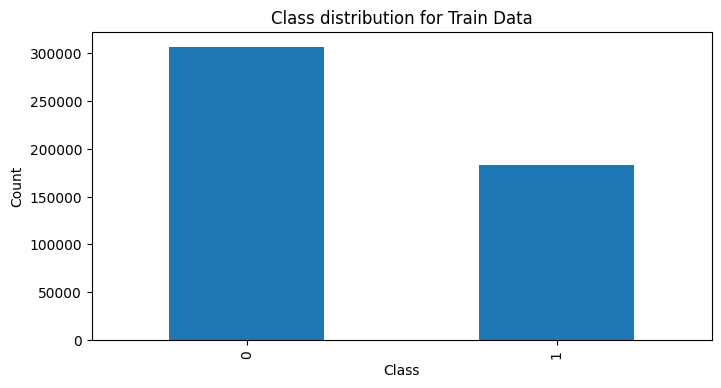

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
combined_df.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

### Note

We can drop random 10k entries from the first class

# Data Preprocessing

## Data cleaning

Remove special characters, numbers, and extra whitespaces, and convert text to lowercase.

In [ ]:
import re

def clean_text(text):
    """
    Cleans the text by removing unwanted characters while retaining periods, commas,
    question marks, and exclamation marks. Converts text to lowercase.
    """
    # Keep only letters, spaces, periods, commas, question marks, and exclamation marks
    text = re.sub(r"[^a-zA-Z\s.,!?]", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    # Convert to lowercase
    return text.lower()

# Apply the cleaning function to the 'text' column
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

# Preview the cleaned text
print(combined_df[['text', 'cleaned_text']].head())


                                                text  \
0  Cars. Cars have been around since they became ...   
1  Transportation is a large necessity in most co...   
2  "America's love affair with it's vehicles seem...   
3  How often do you ride in a car? Do you drive a...   
4  Cars are a wonderful thing. They are perhaps o...   

                                        cleaned_text  
0  cars. cars have been around since they became ...  
1  transportation is a large necessity in most co...  
2  americas love affair with its vehicles seems t...  
3  how often do you ride in a car? do you drive a...  
4  cars are a wonderful thing. they are perhaps o...  


## Tokenization

=>  Split the text into tokens (words or subwords) for further analysis.

The nltk.word_tokenize function from the punkt tokenizer will split the input string into words and preserve punctuation marks as separate tokens.

In [ ]:
# from nltk.tokenize import word_tokenize
# import nltk

# # Download the tokenizer if not already available
# nltk.download('punkt')
# nltk.download('punkt_tab')


# # Tokenize the text
# combined_df['tokens'] = combined_df['cleaned_text'].apply(word_tokenize)

# # Preview tokenized text
# print(combined_df[['cleaned_text', 'tokens']].head())


## Text Vectorization

Convert the processed text into numerical format.

### Explanation of Parameters

- **`lowercase=True`**: Converts all text to lowercase.

- **`stop_words='english'`**: Removes common English stopwords.

- **`token_pattern`**:
  - The default regex (`r"(?u)\b\w\w+\b"`) matches tokens of 2 or more characters.
  - The adjusted regex (`r"(?u)\b\w+\b"`) includes single-character tokens, which can be important for retaining punctuation marks like `.` or `?`.

- **`ngram_range=(1, 1)`**: Specifies unigrams (individual words). You can adjust to include bigrams (`(2, 2)`) or a range (`(1, 2)`).

- **`max_features=5000`**: Limits the number of tokens to the top 5,000 by TF-IDF score. Remove this parameter if you don't want a limit.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the custom vectorizer
vectorizer = TfidfVectorizer(
    lowercase=True,                   # Convert text to lowercase
    stop_words='english',             # Remove stopwords
    token_pattern=r"(?u)\b\w+\b",     # Tokenization pattern to match words
    ngram_range=(1, 1),               # Use unigrams (single words); adjust for n-grams
    max_features=100                 # Limit the number of features (optional)
)

# Apply the vectorizer to your cleaned text column
# X_tfidf = vectorizer.fit_transform(combined_df['text'])
X_tfidf = vectorizer.fit_transform(combined_df['cleaned_text'])

# Get the feature names (tokens) generated by the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the feature names and TF-IDF matrix
print("Feature names:", feature_names[:10])  # Show first 10 tokens
print("TF-IDF matrix shape:", X_tfidf.shape)


In [ ]:
X_tfidf

In [ ]:
print(X_tfidf)

The output of `TfidfVectorizer` is a **sparse matrix** where each row represents a document (in your case, a piece of text), and each column corresponds to a token (word or n-gram) extracted during the vectorization process. The values in this matrix represent the **TF-IDF scores** for each token in each document.

---

### **Breaking Down the Output**

#### **1. Sparse Matrix**
The output is a sparse matrix of shape `(n_samples, n_features)`, where:
- `n_samples` = Number of documents (rows in your dataset).
- `n_features` = Number of unique tokens (columns, also called the vocabulary size).

For example, if you have 5 text samples and the vectorizer identifies 10 unique tokens, the matrix shape will be `(5, 10)`.

#### **2. TF-IDF Scores**
Each value in the matrix is the **TF-IDF score** for a specific token in a specific document. This score indicates the importance of the token in that document relative to the entire corpus.

The formula for TF-IDF is:
\[
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
\]

- **Term Frequency (TF)**: How often a term \(t\) appears in a document \(d\), normalized by the total number of terms in \(d\).
- **Inverse Document Frequency (IDF)**: Measures how unique a term is across all documents. It's calculated as:
  \[
  \text{IDF}(t) = \log \frac{N}{1 + n_t}
  \]
  where \(N\) is the total number of documents, and \(n_t\) is the number of documents containing term \(t\).

#### **3. Feature Names**
The vectorizer also provides the names of the tokens (features) it extracted. You can get them using:
```python
feature_names = vectorizer.get_feature_names_out()


### 2- Vector Embeddings

In [ ]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# !pip uninstall -y tensorflow

In [ ]:
# !pip install tensorflow-cpu

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import re

In [ ]:
# 1. **Load Dataset**
# Split into train and test
texts = combined_df['cleaned_text']
labels = combined_df['generated']
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [ ]:
# 3. **Tokenization using BERT Tokenizer**
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['cleaned_text'], padding='max_length', truncation=True, max_length=128)

In [ ]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from torch.optim.lr_scheduler import ExponentialLR
import torch

# Step 1: Define a custom dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Step 2: Load pre-trained BERT model with classification head
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)  # Binary classification




model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")


# Freeze the parameters of BERT model (only classification head will be trained)
for param in model.distilbert.parameters():
    param.requires_grad = False

# Step 3: Prepare dataset and dataloader
texts = X_train
labels = y_train

dataset = TextDataset(texts, labels, tokenizer, max_len=128)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Step 4: Define optimizer and loss
optimizer = AdamW(model.parameters(), lr=1e-3)
# Define a learning rate scheduler
scheduler = ExponentialLR(optimizer, gamma=0.8)  # Decay factor
loss_fn = CrossEntropyLoss()

# Step 5: Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(3):  # Number of epochs
    model.train()
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss  # Classification loss
        logits = outputs.logits  # Predicted scores

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Step 6: Save the fine-tuned model
model.save_pretrained("./fine_tuned_bert")
tokenizer.save_pretrained("./fine_tuned_bert")


In [ ]:
# Load the fine-tuned model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("./fine_tuned_bert")
model = DistilBertForSequenceClassification.from_pretrained("./fine_tuned_bert")

# Test with a new example
text = "This is a test of the fine-tuned model."
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
predictions = torch.argmax(logits, dim=-1)
print(f"Prediction: {'AI' if predictions.item() == 1 else 'Human'}")


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support



In [ ]:
texts = X_test
labels = y_test

dataset = TextDataset(texts, labels, tokenizer, max_len=128)
test_dataloader = DataLoader(dataset, batch_size=32, shuffle=False)


# Step 2: Load the fine-tuned model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
model = DistilBertForSequenceClassification.from_pretrained("./fine_tuned_bert")
tokenizer = DistilBertTokenizer.from_pretrained("./fine_tuned_bert")

# Step 3: Evaluate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set the model to evaluation mode

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass to get predictions
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)  # Get class predictions

        # Collect predictions and true labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 4: Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="binary")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer()
# X_tfidf = tfidf_vectorizer.fit_transform(result_df['tokens'])

# # View feature names and transformed text
# print(tfidf_vectorizer.get_feature_names_out())
# print(X_tfidf.toarray())


# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                   # Feature matrix from TfidfVectorizer
    combined_df['generated'],         # Target labels (0 = human, 1 = AI-generated)
    test_size=0.3,             # 30% of the data for testing
    random_state=42,           # For reproducibility
    stratify=combined_df['generated'] # Maintain class distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


# Classification After Dataset expansion

In this section, we will be trying more than one approach for this binary classification problem.

Possible Approaches
* Classical ML
* Deep ML


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=50, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


# Calculate accuracies
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")




In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the raw confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # Adjust `cmap` for a color scheme


## Trees

## KNNs / SVMs

## Analysis